<h1 align=center >Wildfire Prediction in Satellite Imagery</h1>

<br>

<img  src="https://raw.githubusercontent.com/doguilmak/Wildfire-Prediction-from-Satellite-Imagery/main/assets/wildfire_canada.png" width=1000  height=250 alt="github.com/doguilmak/Wildfire-Prediction-from-Satellite-Imagery"/>

<small>Picture Source: <a href="https://github.com/doguilmak/Wildfire-Prediction-from-Satellite-Imagery">Doğu İlmak GitHub</a></small>


<br>

<h2>Objectives</h2>

<p>Using <i>longitude</i> and <i>latitude</i> coordinates for each wildfire spot <i>(> 0.01 acres burned)</i> found on the dataset above we extracted satellite images of those areas using <b>MapBox API</b> to create a more convenient format of the dataset for <i>deep learning</i> and building a model that can predict whether an area is at <b>risk of a wildfire</b> or <b>not</b>.</p>

<br>

<h2>About Dataset</h2>

<p>This dataset contains satellite images <i>(350x350px)</i> in 2 classes:</p>

<ul>
  <li>Wildfire : 22710 images</li>
  <li>No wildfire : 20140 images</li>
</ul>

<p>The data was divided into train, test and validation with these percentages:</p>

<ul>
  <li>Train : ~70%</li>
  <li>Test : ~15%</li>
  <li>Validation : ~15%</li>
</ul>

<p>To download the dataset from Kaggle, you need to have a kaggle account.</p>
<ul>
 <li>Dataset download link: <a href='https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset/download?datasetVersionNumber=1'>Dataset</a></li>
 <li>Dataset on Kaggle: <a href='https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset'>Wildfire Prediction Dataset (Satellite Images)</a></li>
</ul>

<br>

<h2>Sources</h2>
<ul>
  <li><a href='https://open.canada.ca/data/en/dataset/9d8f219c-4df0-4481-926f-8a2a532ca003'>Refer to Canada's Website for the Original Wildfires Data (Forest Fires - Open Government Portal)</a>
  <li><a href='https://www.donneesquebec.ca/fr/licence/'>Original License For the Data (Creative Commons 4.0 Attribution (CC-BY) license – Quebec)</a></li>
</ul>

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ul>
      <li><a href="https://#unzip_data"> Unzip data</a></li>
      <li><a href="https://#auxiliary"> Imports and Auxiliary Function </a></li>
      <li><a href="https://#examine_files">Examine Files</a></li>
      <li><a href="https://#Display">Display and Analyze Image With No Trees</a></li>
  </ul>

  <br>

  <p>Estimated Time Needed: <strong>20 min</strong></p>

</div>

<br>

<h2 align=center id="unzip_data">Upload Data</h2>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/AI Data/

/content/gdrive/MyDrive/Colab Notebooks/AI Data


<br>

<h2 align=center id="auxiliary">Imports and Auxiliary Function</h2>

<p>The following are the libraries we are going to use for this lab:</p>

In [35]:
import os
import tensorflow as tf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

import warnings
warnings.filterwarnings("ignore")

<p>We will use this function in the lab to plot:</p>

In [7]:
for device in tf.config.list_physical_devices():
    print(f"{device.name}")

/physical_device:CPU:0


<br>

<h2 align=center id="examine_files">Dataset Preparation</h2>

In [51]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/AI Data/train"
valid_path = "/content/gdrive/MyDrive/Colab Notebooks/AI Data/valid"
test_path = "/content/gdrive/MyDrive/Colab Notebooks/AI Data/test"

<p>If you want to build model as binary classification, you should change <code>num_classes</code> to 1.</p>

In [67]:
image_resize = (350, 350, 3)
batch_size_training = 100 #@param {type:"number"}
batch_size_validation = 100 #@param {type:"number"}
batch_size_test = 100 #@param {type:"number"}
num_classes = 2 #@param {type:"number"}

In [68]:
data_generator = ImageDataGenerator(dtype='float32', rescale= 1./255.)

In [69]:
train_generator = data_generator.flow_from_directory(train_path,
                                                   batch_size = batch_size_training,
                                                   target_size = (350, 350),
                                                   class_mode = 'categorical')

Found 30250 images belonging to 2 classes.


In [70]:
valid_generator = data_generator.flow_from_directory(valid_path,
                                                   batch_size = batch_size_validation,
                                                   target_size = (350, 350),
                                                   class_mode = 'categorical')

Found 6300 images belonging to 2 classes.


In [71]:
class_mapping = train_generator.class_indices
class_mapping

{'nowildfire': 0, 'wildfire': 1}

In [72]:
first_batch_train = train_generator.next()
first_batch_train

(array([[[[0.22352943, 0.34117648, 0.20000002],
          [0.21960786, 0.32941177, 0.18039216],
          [0.24705884, 0.34509805, 0.19215688],
          ...,
          [0.34117648, 0.43921572, 0.35686275],
          [0.44705886, 0.5294118 , 0.454902  ],
          [0.44705886, 0.5019608 , 0.4431373 ]],
 
         [[0.1764706 , 0.29411766, 0.15294118],
          [0.21568629, 0.3254902 , 0.1764706 ],
          [0.24705884, 0.34509805, 0.19215688],
          ...,
          [0.34509805, 0.43921572, 0.3529412 ],
          [0.427451  , 0.5019608 , 0.42352945],
          [0.45882356, 0.50980395, 0.4431373 ]],
 
         [[0.18039216, 0.29803923, 0.15686275],
          [0.20392159, 0.3137255 , 0.16470589],
          [0.24313727, 0.3372549 , 0.19607845],
          ...,
          [0.32941177, 0.4039216 , 0.31764707],
          [0.3803922 , 0.45098042, 0.3647059 ],
          [0.427451  , 0.47058827, 0.4039216 ]],
 
         ...,
 
         [[0.65882355, 0.68235296, 0.63529414],
          [0.67058

In [73]:
first_batch_valid = valid_generator.next()
first_batch_valid

(array([[[[0.18039216, 0.25490198, 0.12941177],
          [0.21960786, 0.29411766, 0.16862746],
          [0.23529413, 0.30980393, 0.19215688],
          ...,
          [0.6156863 , 0.58431375, 0.5019608 ],
          [0.627451  , 0.6       , 0.5254902 ],
          [0.69411767, 0.6745098 , 0.59607846]],
 
         [[0.21176472, 0.28627452, 0.16078432],
          [0.22352943, 0.29803923, 0.17254902],
          [0.2392157 , 0.3137255 , 0.19607845],
          ...,
          [0.59607846, 0.5647059 , 0.48235297],
          [0.6156863 , 0.5882353 , 0.5137255 ],
          [0.65882355, 0.6392157 , 0.56078434]],
 
         [[0.27450982, 0.34901962, 0.22352943],
          [0.24705884, 0.32156864, 0.20392159],
          [0.26666668, 0.34117648, 0.22352943],
          ...,
          [0.63529414, 0.6039216 , 0.52156866],
          [0.6313726 , 0.6039216 , 0.5294118 ],
          [0.6156863 , 0.59607846, 0.52156866]],
 
         ...,
 
         [[0.46274513, 0.47058827, 0.37647063],
          [0.51372

<br>

<h2 align=center id="auxiliary">Compile and Fit VGG16 Model</h2>


<p>VGG16 is a convolution neural net (CNN) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. In this section, we will start building our model. We will use the Sequential model class from Keras.</p>


<p>If you can use my model, please uncomment the following code block and go to <code>model.summary()</code> block.</p>

In [ ]:
# model = load_model('saved_model/vgg16_model.h5')

In [74]:
model = Sequential()

In [75]:
model.add(VGG16(include_top=False, pooling="avg", weights="imagenet"))
model.add(Dense(num_classes, activation="softmax"))

In [76]:
model.layers[0].trainable = False

<p>You can access the model's layers using the <i>layers</i> attribute of our model object.</p>

In [77]:
model.layers[0].layers

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


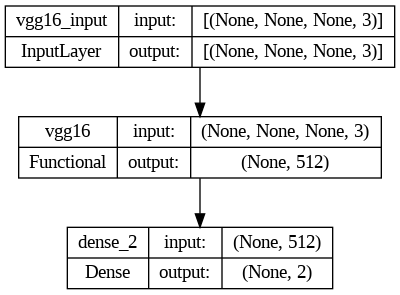

In [79]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [80]:
get_ipython().system('rm -rf logs')

In [81]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [82]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [83]:
num_epochs = 2 #@param {type:"number"}
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(valid_generator)

In [84]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
    callbacks=[tensorboard_callback],
)

Epoch 1/2
  7/303 [..............................] - ETA: 12:28:05 - loss: 0.6888 - accuracy: 0.5557

KeyboardInterrupt: ignored

<br>

<h2 align=center id="analize_model">Analize the Model</h2>

In [ ]:
get_ipython().run_line_magic('tensorboard', '--logdir logs')

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Wildfire Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Wildfire Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/vgg16_model')
print("Model saved!")

In [ ]:
model.save('saved_model/vgg16_model.h5')
print("Model saved!")

<h2 align=center id="make_dataframe">Make DataFrame for the Predictions</h2>

In [ ]:
test_generator = data_generator.flow_from_directory(test_path,
                                                   batch_size = batch_size_test,
                                                   target_size = (350, 350),
                                                   class_mode = 'categorical')

In [ ]:
filenames = test_generator.filenames

In [ ]:
pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1).round(3)

In [ ]:
filenames_df = pd.DataFrame(filenames, columns=['File Path'])
pred_df = pd.DataFrame(pred, columns=['No Wildfire Probability', 'Wildfire Probability'])
model_predictions = pd.concat([filenames_df, pred_df], axis=1)
model_predictions

In [ ]:
!mkdir -p predictions

In [ ]:
file_name='predictions/vgg16_model_predictions.csv'
model_predictions.to_csv(file_name, sep=',', encoding='utf-8')

<br>

<h2>Contact Me</h2>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [ ]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-02-16 20:59:35
